#Estudo de caso de vizualização de dados 2

Categoria: Explicativo

Grupo:

Edgard Henrique Coelho Tavares da Silva - 20210027041

Gabriel Vieira Coutinho - 20210139075

Gustavo Henrique de Carvalho Costa Filho - 20210027060

O conjunto de dados analisado foi fornecido pela Olist, uma startup brasileira que opera na interface de tecnologia para o varejo, conectando pequenas empresas a grandes canais de venda. Este rico dataset, contendo mais de 100.000 registros, oferece uma visão abrangente do mercado de e-commerce no Brasil, incluindo detalhes como formas de pagamento, geolocalização e informações de produtos.

A relevância dessa análise se acentua no contexto atual, onde o e-commerce se estabelece como um pilar central da economia global, impulsionado pela crescente digitalização da sociedade e pela mudança nos padrões de consumo.
O Brasil, em particular, emerge como um protagonista no cenário do comércio eletrônico na América Latina, registrando um crescimento expressivo nos últimos anos. Este avanço reflete não apenas a expansão da infraestrutura digital, mas também uma adaptação cultural à nova era de transações online. Contudo, o e-commerce brasileiro enfrenta desafios significativos: desde a complexidade logística impostas pela vastidão territorial, passando pela segurança das transações online, até a intensa concorrência no setor e a necessidade de estar em constante atualização tecnológica. Navegar por esse cenário, reconhecendo tanto as oportunidades quanto os obstáculos, é crucial para qualquer entidade que aspire ao sucesso no dinâmico mercado de e-commerce do Brasil.


Link Kaggle: https://www.kaggle.com/code/paritoshmahto/brazilian-e-commerce-data-analysis

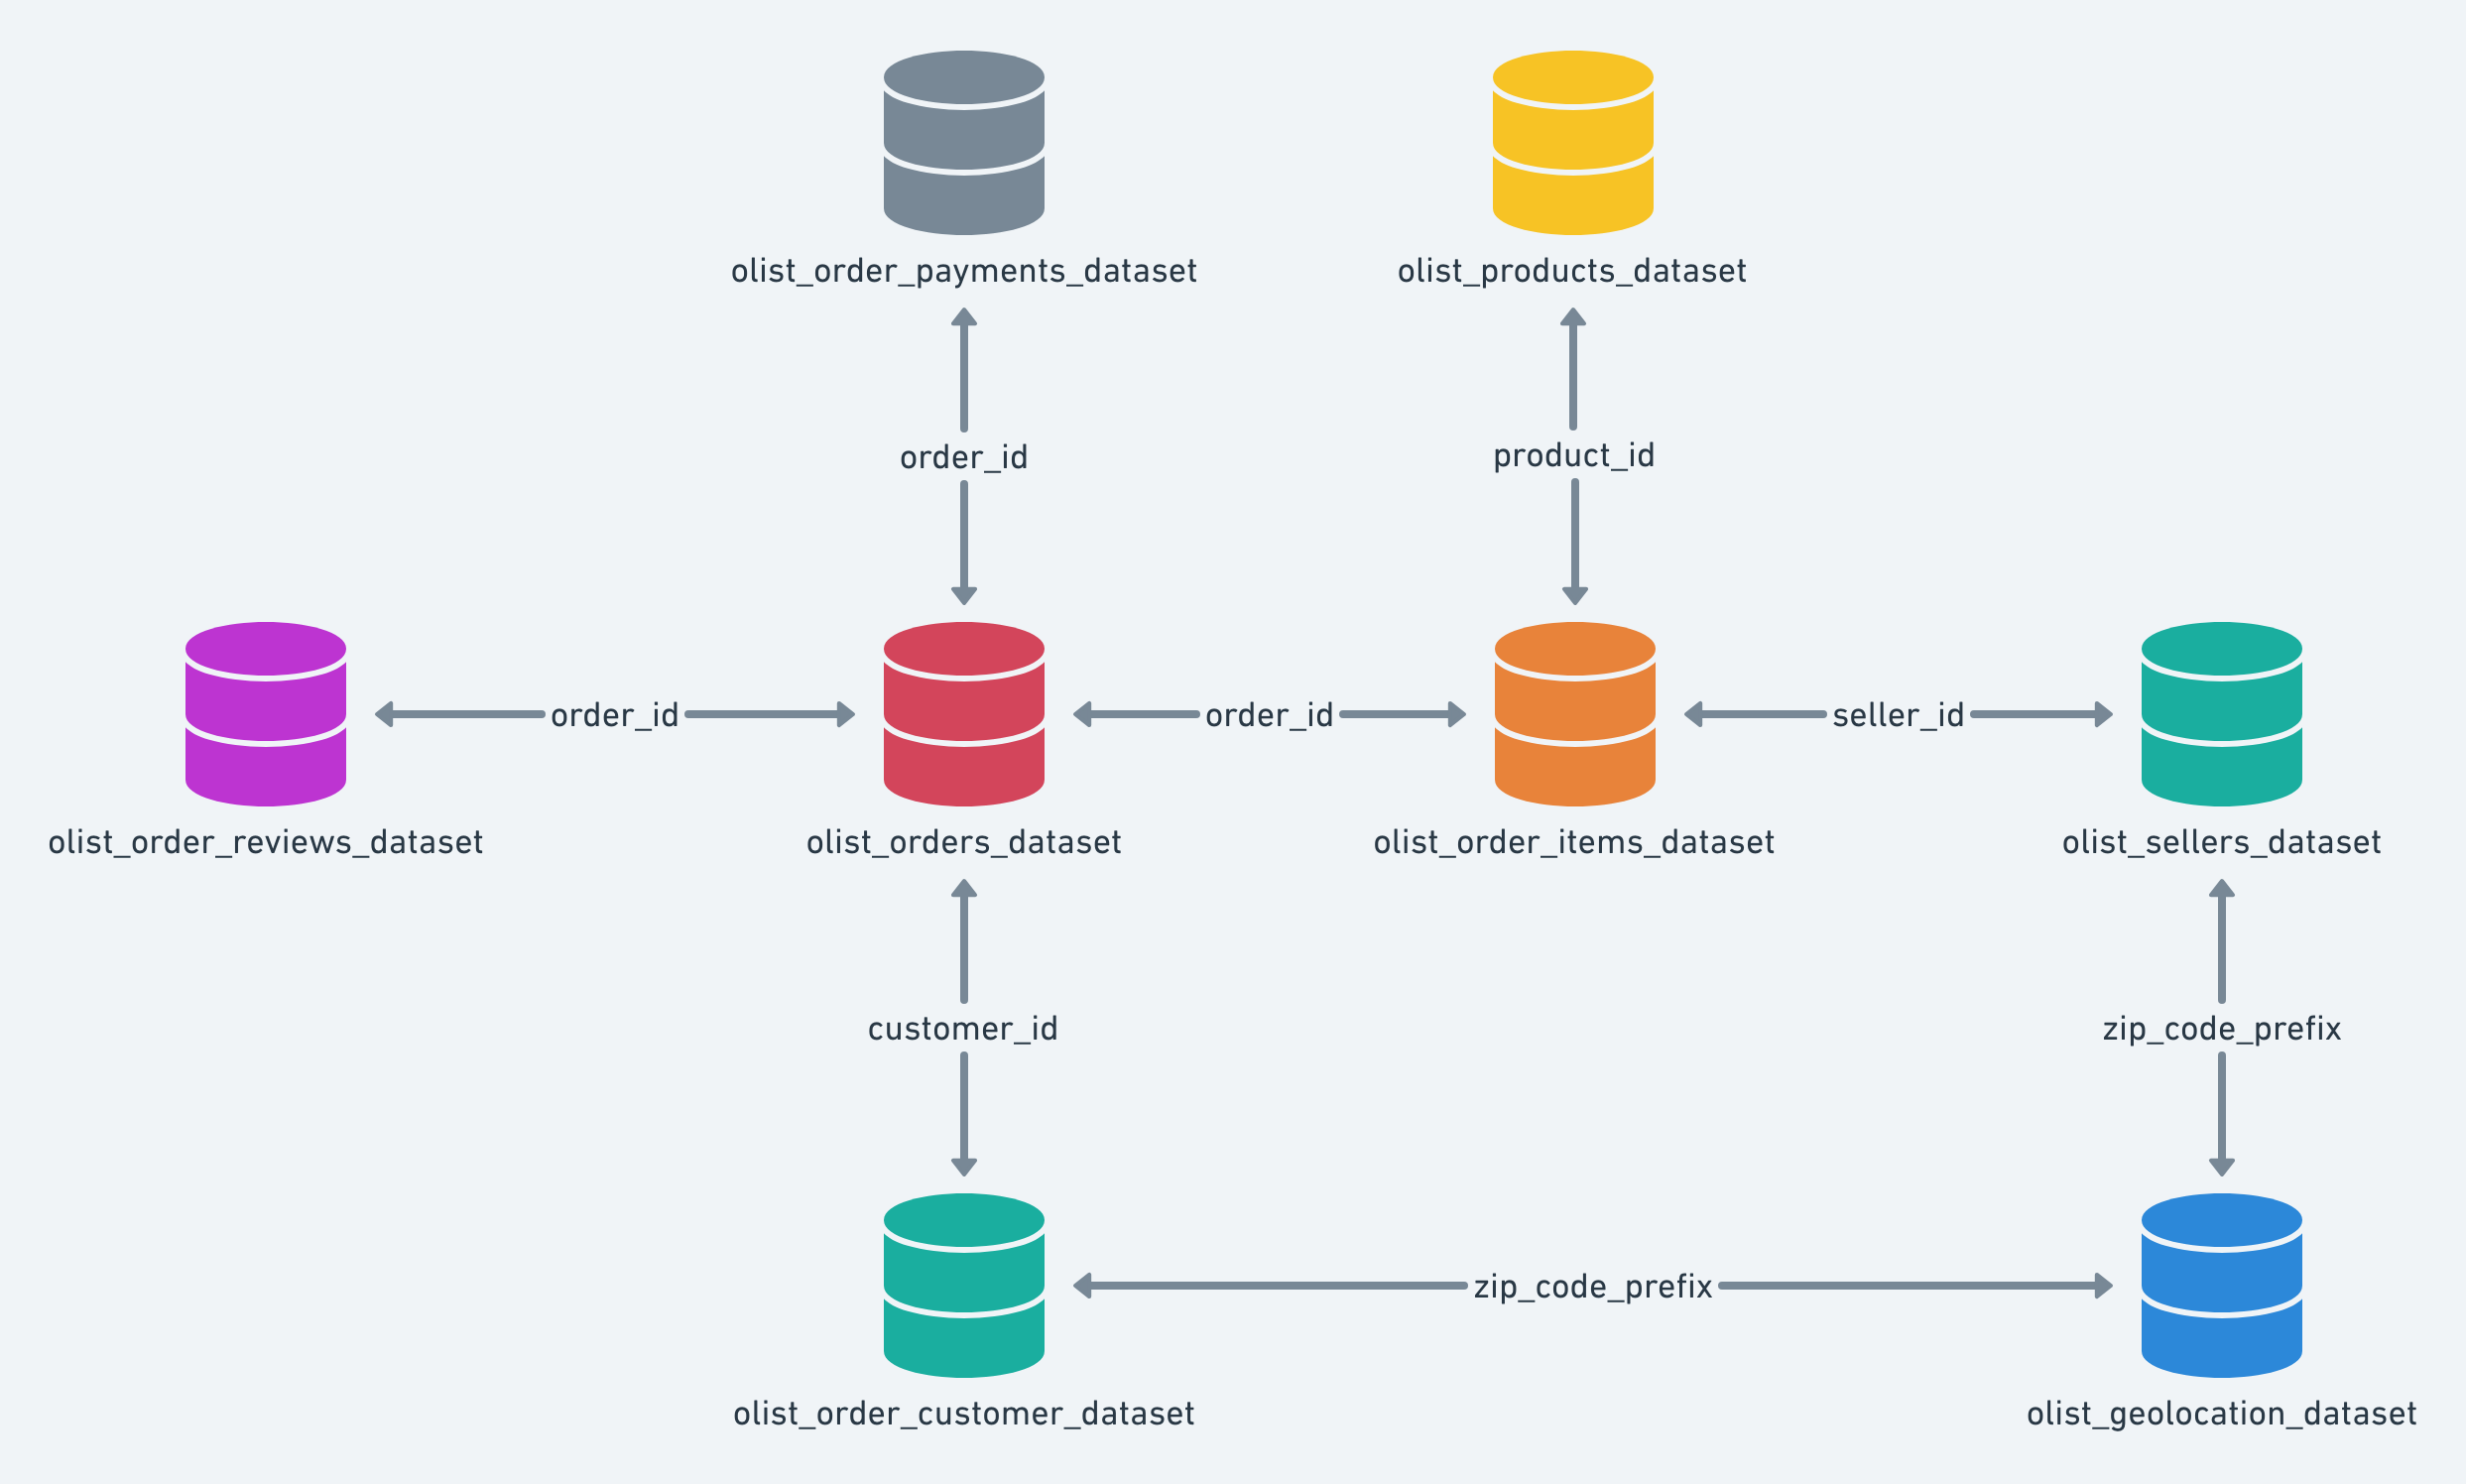

Diagrama de relacionamento de entidade do banco de dados, mostrando como várias tabelas do datasets se relacionam entre si

##Importações

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from branca.colormap import LinearColormap
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

##De onde vem as compras ?

In [ ]:
df_locations = pd.read_csv("/content/olist_geolocation_dataset.csv")

In [ ]:
# Agrupar os dados por estado e contar o número de registros em cada um
data_grouped_by_state = df_locations.groupby('geolocation_state').size().reset_index(name='count')

# Exibir o resultado do agrupamento
data_grouped_by_state

,geolocation_state,count
0,AC,1301
1,AL,4183
2,AM,2432
3,AP,853
4,BA,36045
5,CE,11674
6,DF,12986
7,ES,16748
8,GO,20139
9,MA,7853


In [ ]:
data_grouped_by_state['count'].describe(percentiles=[.05, .10, .20, .40, .60, .80, .90, .95])

count        27.000000
mean      37043.074074
std       80575.410959
min         646.000000
5%          987.400000
10%        1979.600000
20%        3565.600000
40%        6464.000000
50%       10853.000000
60%       12604.000000
80%       37871.400000
90%       85578.200000
95%      124785.900000
max      404268.000000
Name: count, dtype: float64

In [ ]:
geo_json_path = '/content/br_states (1).json'

In [ ]:
def get_color(count):
    if count > 124785:  # Percentil 95
        return '#61001d'
    elif count > 85578:  # Percentil 90
        return '#BD0026'
    elif count > 37871:  # Percentil 80
        return '#E31A1C'
    elif count > 12604:  # Percentil 60
        return '#FC4E2A'
    elif count > 10853:  # Percentil 50
        return '#fd7c3c'
    elif count > 3565:   # Percentil 20
        return '#FEB24C'
    elif count > 1979:   # Percentil 10
        return '#FED976'
    else:                # Abaixo do Percentil 10
        return '#FFEDA0'

In [ ]:
# Criar uma paleta de cores usando a função get_color
color_scale = LinearColormap(
    ['#FFEDA0','#FED976','#FEB24C','#fd7c3c','#FC4E2A','#E31A1C','#BD0026','#61001d'],
    vmin=min(data_grouped_by_state['count']), vmax=max(data_grouped_by_state['count']),
    caption='Número de registros por estado'
)

In [ ]:
mapa_choropleth = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Adicionar o Choropleth ao mapa
choropleth = folium.GeoJson(
    geo_json_path,
    style_function=lambda feature: {
        'fillColor': get_color(data_grouped_by_state.loc[data_grouped_by_state['geolocation_state'] == feature['id'], 'count'].values[0]),
        'color': 'black',
        'weight': 0.25,
        'fillOpacity': 0.7
    }
).add_to(mapa_choropleth)

# Adicionar a paleta de cores como uma legenda
mapa_choropleth.add_child(color_scale)


In [ ]:
print(data_grouped_by_state.head())

In [ ]:
mapa_choropleth.save("mapa.html")

###Mapa coroplético representando o número de registros por estado no Brasil, com variação de cores indicando a quantidade, sendo os estados do Sudeste os mais destacados, possibilitando a identificação de regiões geográficas com maior volume de vendas. Essa análise permite uma melhor compreensão da distribuição do mercado de e-commerce no Brasil, contribuindo para a elaboração de estratégias de expansão e segmentação de público-alvo.

In [ ]:
data_grouped_by_state = data_grouped_by_state.sort_values('count')

color_list = data_grouped_by_state['count'].apply(get_color)

fig = px.bar(data_grouped_by_state, x='geolocation_state', y='count',
             text='count', title='Contagem de vendas por Estado')
fig.update_traces(marker_color=color_list)
fig.update_layout(xaxis_title="Estado", yaxis_title="Contagem", showlegend=False)

fig.show()

###Gráfico de barras em ordem crescente do número de registros por estado do Brasil, que permite uma melhor visualização de outliers como São Paulo que possuem um valor aberrante em relação aos outros estados.





##Quais as principais semanas do ano que tem vendas ?

In [ ]:
orders_data = pd.read_csv('/content/olist_orders_dataset.csv')
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])

In [ ]:
orders_data['week_of_year'] = orders_data['order_purchase_timestamp'].dt.isocalendar().week
weekly_order_counts = orders_data.groupby('week_of_year')['order_id'].count().reset_index()

In [ ]:
fig_weekly = px.line(weekly_order_counts,
                     x='week_of_year',
                     y='order_id',
                     title='Número de Pedidos por Semana do Ano',
                     markers=True)
fig_weekly.update_layout(xaxis_title="Semana do Ano", yaxis_title="Número de Pedidos", showlegend=False)
fig_weekly.show()

###Gráfico de linha do número de pedidos semanais ao longo de um ano, destacando picos de vendas em determinados períodos do ano, como durante a Black Friday e meses próximos ao Natal, o que indica a importância de estratégias de marketing sazonais para impulsionar as vendas.

##Quais os dias da semana que mais tem vendas ?

In [ ]:
orders_data['day_of_week'] = orders_data['order_purchase_timestamp'].dt.dayofweek.map({0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'})
weekday_order_counts = orders_data['day_of_week'].value_counts(normalize=True) * 100
weekday_order_counts = weekday_order_counts.reset_index()
weekday_order_counts.columns = ['day_of_week', 'percent']
weekday_order_counts['day_of_week'] = pd.Categorical(weekday_order_counts['day_of_week'],
                                                      categories=['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo'],
                                                      ordered=True)
weekday_order_counts.sort_values('day_of_week', inplace=True)


In [ ]:
fig_dayofweek = px.bar(weekday_order_counts, x='day_of_week', y='percent',
                       title='Porcentagem dos pedidos por dia da semana',
                       labels={'percent':'Porcentagem dos pedidos', 'day_of_week':'Dia da semana'},
                       text='percent',
                       color='day_of_week',
                       color_discrete_sequence=px.colors.qualitative.Set3)  # Usando a paleta de cores 'Set3'

fig_dayofweek.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Mostrar o gráfico
fig_dayofweek.show()

### Distribuição percentual de pedidos por dia da semana, mostrando maior frequência às segundas-feiras e menor aos sábados.

##Em qual turno acontece a maior quantidade de vendas ?

In [ ]:
bins = [-1, 6, 12, 18, 24]
labels = ['Amanhecer', 'Manhã', 'Tarde', 'Noite']
orders_data['time_of_day'] = pd.cut(orders_data['order_purchase_timestamp'].dt.hour, bins=bins, labels=labels, right=True)

# Contar o número total de pedidos por período do dia
timeofday_order_counts = orders_data['time_of_day'].value_counts(normalize=True) * 100
timeofday_order_counts = timeofday_order_counts.reset_index()
timeofday_order_counts.columns = ['time_of_day', 'percent']
timeofday_order_counts['time_of_day'] = pd.Categorical(timeofday_order_counts['time_of_day'],
                                                       categories=labels,
                                                       ordered=True)
timeofday_order_counts.sort_values('time_of_day', inplace=True)

In [ ]:
# Definir cores significativas para cada período do dia
cor = ['#fd3411', '#66b3ff', '#db640b', '#160821']

fig_timeofday = px.bar(timeofday_order_counts, x='time_of_day', y='percent',
                       title='Porcentagem dos pedidos por período do dia',
                       labels={'percent':'Porcentagem dos pedidos', 'time_of_day':'Período do dia'},
                       text='percent',
                       color='time_of_day',
                       color_discrete_sequence=cor)  # Usando a paleta de cores personalizada


fig_timeofday.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Mostrar o gráfico
fig_timeofday.show()

###Gráfico de barras da porcentagem de pedidos por período do dia, com a tarde liderando e o amanhecer com menos pedidos.

##Os pedidos chegam a tempo ?

In [ ]:
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])


orders_data['Delivery Status'] = 'Atraso na Entrega'

early_delivery = orders_data['order_delivered_customer_date'] < orders_data['order_estimated_delivery_date']
orders_data.loc[early_delivery, 'Delivery Status'] = 'Antes do previsto'

on_time_delivery = orders_data['order_delivered_customer_date'] == orders_data['order_estimated_delivery_date']
orders_data.loc[on_time_delivery, 'Delivery Status'] = 'No tempo previsto'


delivery_status_counts = orders_data['Delivery Status'].value_counts(normalize=True) * 100

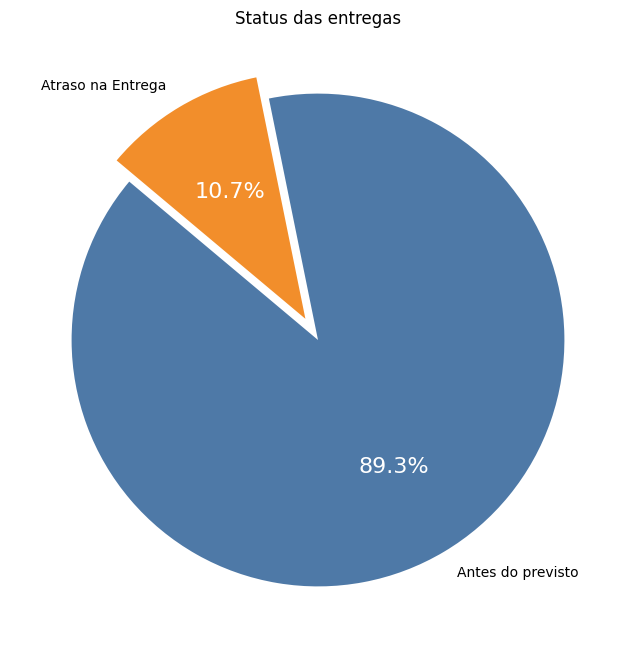

In [ ]:
cor = ['#4e79a7' if status == 'Antes do previsto' else '#f28e2b' for status in delivery_status_counts.index]
plt.figure(figsize=(8, 8))
#plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140, explode = [0,0.1], colors = cor)
patches, texts, autotexts = plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%',
        startangle=140, explode=[0,0.1], colors=cor)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)
plt.title('Status das entregas')
plt.show()

### Gráfico de pizza mostrando o status das entregas, com 89.3% realizadas antes do previsto e 10,7% com atraso. Este gráfico é essencial para visualizar a eficiência logística e a satisfação do cliente.

##Qual o preço médio dos pedidos ?

In [ ]:
orders_items = pd.read_csv('/content/olist_order_items_dataset.csv')

In [ ]:
# Definindo intervalos de preço para categorização
bins = [0, 50, 100, 200, 500, 1000, orders_items['price'].max()]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001+']

# Criando uma nova coluna para os intervalos de preço
orders_items['price_range'] = pd.cut(orders_items['price'], bins=bins, labels=labels, right=False)

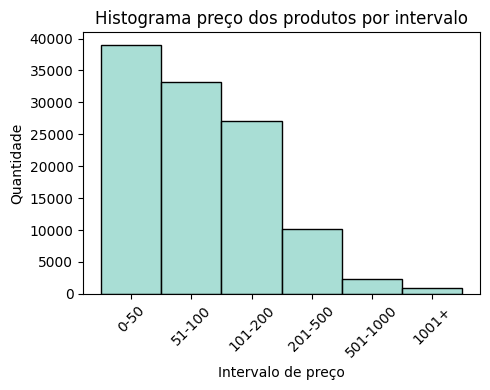

In [ ]:
with sns.color_palette("Set3"):
    plt.figure(figsize=(5, 4))
    sns.histplot(orders_items, x='price_range', stat='count')
    plt.title('Histograma preço dos produtos por intervalo')
    plt.xlabel('Intervalo de preço')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)  # Rotate labels for better visualization
    plt.tight_layout()
    plt.show()

### Gráfico de distribuição de frequência de produtos por faixa de preço.

##Quais as formas de pagamento mais comum ?

In [ ]:
orders_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')

In [ ]:
# Removendo as entradas com método de pagamento 'not_defined'
orders_payments = orders_payments[orders_payments['payment_type'] != 'not_defined']

# Traduzindo as categorias para o português
payments_translation = {
    'credit_card': 'Cartão de Crédito',
    'boleto': 'Boleto',
    'voucher': 'Voucher',
    'debit_card': 'Cartão de Débito'
}
orders_payments['payment_type'] = orders_payments['payment_type'].map(payments_translation)


payment_counts = orders_payments['payment_type'].value_counts(normalize=True) * 100
payment_counts = payment_counts.reset_index()
payment_counts.columns = ['payment_type', 'percent']

In [ ]:
fig = px.bar(payment_counts, x='percent', y='payment_type', orientation='h',
             title='Frequência dos Métodos de Pagamento',
             labels={'payment_type': 'Método de Pagamento', 'percent': 'Porcentagem'})

fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  xaxis_title='Porcentagem',
                  yaxis_title='Método de Pagamento')

fig.update_traces(marker_color=px.colors.qualitative.Set3, text=payment_counts['percent'].round(2).astype(str) + '%',
                  textposition='outside')

fig.show()


###Gráfico de barras horizontal da frequência dos métodos de pagamento, com o cartão de crédito predominante.
